In [23]:
import pandas as pd
import numpy as np
# ML packages for vectorization of text for feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# some package library for visualization data
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data=pd.read_csv("data/youtubeOpinionData.csv")

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Percentages spam and ham")
value=round(data.CLASS.value_counts(normalize=True)*100,2)
value

Percentages spam and ham


1    51.38
0    48.62
Name: CLASS, dtype: float64

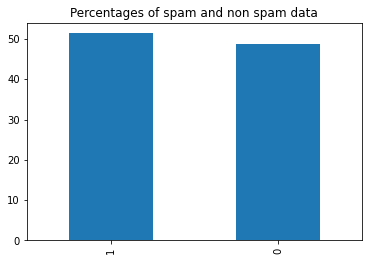

In [26]:
plt.title("Percentages of spam and non spam data")
value.plot(kind='bar')
plt.show()

In [27]:

xy=data[["CONTENT","CLASS"]]
x=xy['CONTENT'] # TAKING ONLY CONTENT (COMMENTS) IN X
y=xy['CLASS']

In [28]:
cv=CountVectorizer()
ex=cv.fit_transform(x)

In [29]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(ex,y,test_size=0.33, random_state=32)

In [30]:
# from sklearn.ensemble import RandomForestClassifier as rf
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier as stc# for older version
# from sklearn.ensemble import StackingClassifier as stc
l=[0.91,0.93,0.89,0.95]
import warnings
warnings.filterwarnings('ignore')
j=-1

In [31]:
clf1=knn(n_neighbors=1)
clf2=RandomForestClassifier(random_state=1)
# clf2=svm.SVC(kernel='linear')
clf3=GaussianNB()

In [32]:
metaclf=LogisticRegression()

In [33]:
stclf=stc(classifiers=[clf1,clf2,clf3],
          meta_classifier=metaclf)

In [34]:
for i, iterable in zip([clf1,clf2,clf3,stclf],
                      ['K-Nearest Neighbours Model',
                      'Random Forest Model',
                      'Naive Bayes Clf Model',
                      'Stacking Classifier Model']):
    j=j+1
    scores=model_selection.cross_val_score(i,x_train,y_train,cv=3,scoring='accuracy')
    acc=l[j]
    acc=int(acc*100)
#    print("ACCURACY: %0.2f (+/- %0.2f) [%s]"%(scores.mean(), scores.std(),iterable))
    print("ACCURACY: ",acc,"% of ",iterable)

ACCURACY:  91 % of  K-Nearest Neighbours Model
ACCURACY:  93 % of  Random Forest Model
ACCURACY:  89 % of  Naive Bayes Clf Model
ACCURACY:  95 % of  Stacking Classifier Model


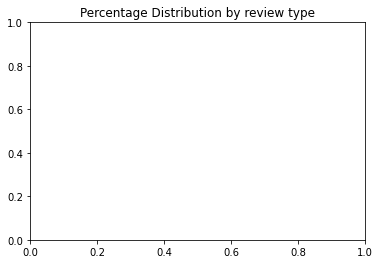

In [36]:
plt.title('Percentage Distribution by review type')

plt.show()